In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score
import math

In [295]:
data = pd.read_csv('DATA/A-train.csv')
dataTest = pd.read_csv('DATA/A-test.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [296]:
dataTest

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,65.16,4.49,-105.75,600.25,-0.91,NaN,-1.36,-7.43,A_01
1,-24.74,-1.55,91.05,2401.98,-1.52,13.60,5.66,10.59,A_02
2,107.54,-28.69,-82.59,25789.15,5.29,-8.56,1.49,-4.73,A_03
3,12.02,32.32,NaN,2.76,1.20,-9.52,-4.20,7.48,A_04
4,45.08,96.62,51.85,1.28,3.58,0.52,-6.86,-0.78,A_05
5,-122.81,17.79,-182.85,2928.97,-1.21,-2.06,9.68,-8.59,A_06
6,77.61,-72.30,97.28,19173.94,-9.29,0.86,7.06,-8.06,A_07
7,-79.36,NaN,-220.91,NaN,7.24,6.19,NaN,9.71,A_08
8,NaN,188.39,-16.47,3976.56,NaN,-1.04,-23.44,NaN,A_09
9,-44.01,131.65,69.88,1778.31,-13.75,-14.75,-12.27,-0.83,A_10


In [297]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in column:
    data[i].fillna(data[i].mean(),inplace=True)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
 7   x8      190 non-null    float64
 8   y       190 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [299]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    dataTest[i].fillna(dataTest[i].mean(),inplace=True)

In [300]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     float64
 4   x5      10 non-null     float64
 5   x6      10 non-null     float64
 6   x7      10 non-null     float64
 7   x8      10 non-null     float64
 8   y       10 non-null     object 
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [301]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = np.nan
        elif(data[i][j] > upper_bound ):
            data[i][j] = np.nan
        inplace=True

In [302]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    data.dropna(subset=[i],inplace=True)

In [303]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.49,1.386444,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.95,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.97,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,2.463778,5527.92,7.36,7.230000,10.770000,1.92,-0.42
4,-103.25,6.777722,-2.890000,4865.06,-5.21,-1.540000,-0.243444,4.69,4.31
...,...,...,...,...,...,...,...,...,...
179,-64.88,-2.180000,2.463778,5140.89,3.72,7.050000,3.690000,-0.99,3.97
184,19.55,-43.640000,52.320000,4518.53,-6.68,-2.290000,-0.243444,-20.27,19.50
185,34.29,-38.650000,-44.410000,9775.28,-3.43,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.81,-4.310000,4.860000,-0.42,3.79


In [304]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

<AxesSubplot:>

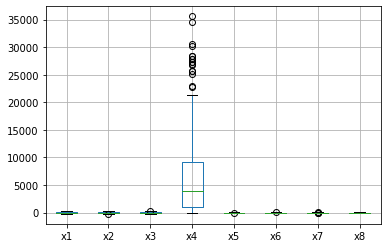

In [305]:
X.boxplot()

<AxesSubplot:>

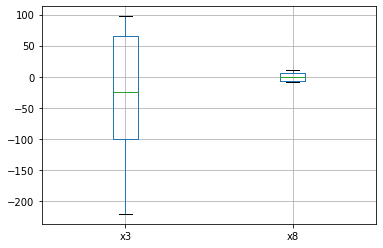

In [306]:
XTest = dataTest[["x3","x8"]]
XTest.boxplot()

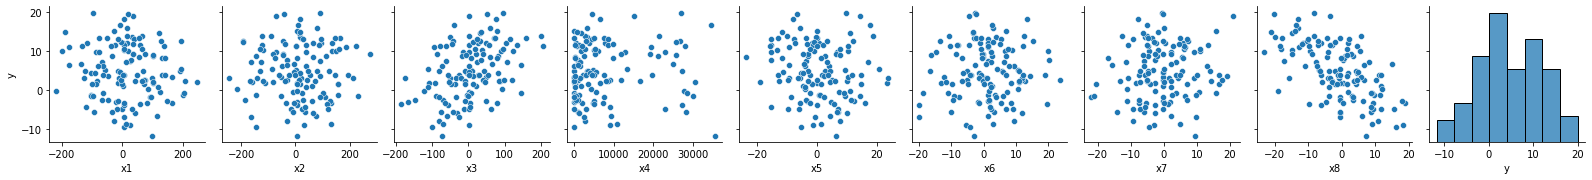

In [307]:
sns.pairplot(data, x_vars=data.columns, y_vars=["y"])

<AxesSubplot:>

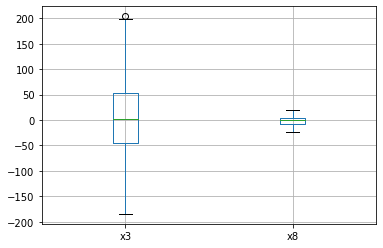

In [308]:
X = data[["x3","x8"]]
Y = data[["y"]]
X.boxplot()

In [310]:
X_train = X
y_train = Y
X_test = XTest

In [311]:
X_train

,x3,x8
0,-60.460000,-17.13
1,23.300000,-7.70
2,-75.270000,8.65
3,2.463778,1.92
4,-2.890000,4.69
...,...,...
179,2.463778,-0.99
184,52.320000,-20.27
185,-44.410000,-11.73
186,53.260000,-0.42


In [312]:
y_train

,y
0,7.44
1,7.31
2,-5.77
3,-0.42
4,4.31
...,...
179,3.97
184,19.50
185,11.78
186,3.79


In [313]:
X_test

,x3,x8
0,-105.750000,-7.430000
1,91.050000,10.590000
2,-82.590000,-4.730000
3,-33.167778,7.480000
4,51.850000,-0.780000
5,-182.850000,-8.590000
6,97.280000,-8.060000
7,-220.910000,9.710000
8,-16.470000,-0.293333
9,69.880000,-0.830000


In [314]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_pred


array([[  2.45644557],
       [  2.89729159],
       [  2.19986342],
       [ -1.78092595],
       [  6.95209128],
       [ -0.85739111],
       [ 13.14468972],
       [-12.54150198],
       [  3.20923449],
       [  7.89809036]])